In [0]:
#######################################################
### 3252 Big Data Management Project                ###
### Dec 2020                                        ###
### IMDB Revenue Forecast using XGBoost Regression   ##
### Oscar Sun                                  ########
#######################################################

In [0]:
file_location = "/FileStore/tables/imdb_kaggle.csv"
file_type = "csv"
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","
df = spark.read.format(file_type).option("inferSchema", "true").option("header",first_row_is_header)\
.option("sep",delimiter).option("nanValue",'').option("nullValue",'').load(file_location)
# .option("schema","project: string ,article: string ,requests: integer ,bytes_served: long")

In [0]:
df.printSchema()

root
-- id: string (nullable = true)
-- imdb_id: string (nullable = true)
-- popularity: string (nullable = true)
-- budget: string (nullable = true)
-- revenue: string (nullable = true)
-- original_title: string (nullable = true)
-- cast: string (nullable = true)
-- homepage: string (nullable = true)
-- director: string (nullable = true)
-- tagline: string (nullable = true)
-- keywords: string (nullable = true)
-- overview: string (nullable = true)
-- runtime: string (nullable = true)
-- genres: string (nullable = true)
-- production_companies: string (nullable = true)
-- release_date: string (nullable = true)
-- vote_count: string (nullable = true)
-- vote_average: string (nullable = true)
-- release_year: string (nullable = true)
-- budget_adj: string (nullable = true)
-- revenue_adj: string (nullable = true)

In [0]:
display(df)

id imdb_id popularity budget revenue original_title cast homepage director tagline keywords overview runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj 135397 tt0369610 32.985763 $150,000,000 $1,513,528,810 Jurassic World Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson http://www.jurassicworld.com/ Colin Trevorrow The park is open. monster|dna|tyrannosaurus rex|velociraptor|island Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond. 124 Action|Adventure|Science Fiction|Thriller Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu 6/9/2015 5562 6.5 2015 137999939 1392445893 76341 tt1392190 28.419936 $150,000,000 $378,436,354 Mad Max: Fury Road Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman http://www.madmaxmovie.com/ George Miller What a Lovely Day. future|chase|post-apocalyptic|dystopia|australia An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland. 120 Action|Adventure|Science Fiction|Thriller Village Roadshow Pictures|Kennedy Miller Productions 5/13/2015 6185 7.1 2015 137999939 348161293 262500 tt2908446 13.112507 $110,000,000 $295,238,201 Insurgent Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller http://www.thedivergentseries.movie/#insurgent Robert Schwentke One Choice Can Destroy You based on novel|revolution|dystopia|sequel|dystopic future Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart. 119 Adventure|Science Fiction|Thriller Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel 3/18/2015 2480 6.3 2015 101199956 271619025 140607 tt2488496 11.173104 $200,000,000 $2,068,178,225 Star Wars: The Force Awakens Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley http://www.starwars.com/films/star-wars-episode-vii J.J. Abrams Every generation has a story. android|spaceship|jedi|space opera|3d Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers. 136 Action|Adventure|Science Fiction|Fantasy Lucasfilm|Truenorth Productions|Bad Robot 12/15/2015 5292 7.5 2015 183999919 1902723130 168259 tt2820852 9.335014 $190,000,000 $1,506,249,360 Furious 7 Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson http://www.furious7.com/ James Wan Vengeance Hits Home car race|speed|revenge|suspense|car Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother. 137 Action|Crime|Thriller Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films 4/1/2015 2947 7.3 2015 174799923 1385748801 281957 tt1663202 9.1107 $135,000,000 $532,950,503 The Revenant Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson http://www.foxmovies.com/movies/the-revenant Alejandro GonzÃ¡lez IÃ±Ã¡rritu (n. One who has returned, as if from the dead.) father-son relationship|rape|based on novel|mountains|winter In the 1820s, a frontiersman, Hugh Glass, sets out on a path of vengeance against those who left him for dead after a bear mauling. 156 Western|Drama|Adventure|Thriller Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures 12/25/2015 3929 7.2 2015 124199945

In [0]:
df = df.withColumn("id", df["id"].cast(IntegerType()))
df = df.withColumn("imdb_id", df["imdb_id"].cast(StringType()))
df = df.withColumn("popularity",(df["popularity"]).cast(DoubleType()))
df = df.withColumn("budget", df["budget"].cast(DoubleType()))
df = df.withColumn("revenue", df["revenue"].cast(DoubleType()))
df = df.withColumn("original_title", df["original_title"].cast(StringType()))
df = df.withColumn("cast", df["cast"].cast(StringType()))
df = df.withColumn("homepage",df["homepage"].cast(StringType()))
df = df.withColumn("homepage", when(df["homepage"]!= "null" , 1).otherwise(0))
df = df.withColumn("director", df["director"].cast(StringType()))
df = df.withColumn("tagline", df["tagline"].cast(StringType()))
df = df.withColumn("keywords", df["keywords"].cast(StringType()))
df = df.withColumn("overview", df["overview"].cast(StringType()))
df = df.withColumn("runtime", df["runtime"].cast(IntegerType()))
df = df.withColumn("genres", df["genres"].cast(StringType()))
df = df.withColumn("production_companies", df["production_companies"].cast(StringType()))
# df = df.withColumn("release_date", to_timestamp(df["release_date"], "yyyy_MM_dd"))
# I CANNOT FORMAT THE RELEASE DATE TO TIMESTAMP. I WANTED TO CREATE RELEASE MONTH AS A FEATURE. PLEASE HELP!!!
# df = df.withColumn("release_date",df["release_date"].astype('Timestamp'))
df = df.withColumn("vote_count", df["vote_count"].cast(IntegerType()))
df = df.withColumn("vote_average", df["vote_average"].cast(DoubleType()))
df = df.withColumn("release_year", df["release_year"].cast(IntegerType()))
df = df.withColumn("budget_adj", df["budget_adj"].cast(DoubleType()))
df = df.withColumn("revenue_adj", df["revenue_adj"].cast(DoubleType()))

In [0]:
# from pyspark.sql.functions import unix_timestamp, from_unixtime

# # df2 = df.select(
# #     'release_date', 
# #     from_unixtime(unix_timestamp('release_date', 'MM/dd/yyy')).alias('date')
# # )
# from pyspark.sql.functions import to_timestamp
# # # df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
# # df2 = df.select(to_timestamp(df.release_date, 'MM-dd-yyyy').alias('release_dt')).collect()
# # # [Row(dt=datetime.datetime(1997, 2, 28, 10, 30))]

# df = df.withColumn("month", to_timestamp(from_unixtime(df.release_date, "MM/dd/yyyy"), "MM"))

# import datetime
# from pyspark.sql.functions import year, month, dayofmonth
# from pyspark.sql.functions import *
# newdf = df.select(year(df.release_date).alias('dt_year'), month(df.release_date).alias('dt_month'), dayofmonth(df.release_date).alias('dt_day'))
# newdf.show()

In [0]:
display(df)

id imdb_id popularity budget revenue original_title cast homepage director tagline keywords overview runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj 135397 tt0369610 32.985763 null null Jurassic World Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson 1 Colin Trevorrow The park is open. monster|dna|tyrannosaurus rex|velociraptor|island Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond. 124 Action|Adventure|Science Fiction|Thriller Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu 6/9/2015 5562 6.5 2015 1.37999939E8 1.392445893E9 76341 tt1392190 28.419936 null null Mad Max: Fury Road Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman 1 George Miller What a Lovely Day. future|chase|post-apocalyptic|dystopia|australia An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland. 120 Action|Adventure|Science Fiction|Thriller Village Roadshow Pictures|Kennedy Miller Productions 5/13/2015 6185 7.1 2015 1.37999939E8 3.48161293E8 262500 tt2908446 13.112507 null null Insurgent Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller 1 Robert Schwentke One Choice Can Destroy You based on novel|revolution|dystopia|sequel|dystopic future Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart. 119 Adventure|Science Fiction|Thriller Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel 3/18/2015 2480 6.3 2015 1.01199956E8 2.71619025E8 140607 tt2488496 11.173104 null null Star Wars: The Force Awakens Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley 1 J.J. Abrams Every generation has a story. android|spaceship|jedi|space opera|3d Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers. 136 Action|Adventure|Science Fiction|Fantasy Lucasfilm|Truenorth Productions|Bad Robot 12/15/2015 5292 7.5 2015 1.83999919E8 1.90272313E9 168259 tt2820852 9.335014 null null Furious 7 Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson 1 James Wan Vengeance Hits Home car race|speed|revenge|suspense|car Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother. 137 Action|Crime|Thriller Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films 4/1/2015 2947 7.3 2015 1.74799923E8 1.385748801E9 281957 tt1663202 9.1107 null null The Revenant Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson 1 Alejandro GonzÃ¡lez IÃ±Ã¡rritu (n. One who has returned, as if from the dead.) father-son relationship|rape|based on novel|mountains|winter In the 1820s, a frontiersman, Hugh Glass, sets out on a path of vengeance against those who left him for dead after a bear mauling. 156 Western|Drama|Adventure|Thriller Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures 12/25/2015 3929 7.2 2015 1.24199945E8 4.90314247E8 87101 tt1340138 8.654359 null null Terminator Genisys Arnold Schwarzenegger|Jason Clarke|Emilia Clarke|Jai Courtney|J.K. Simmons 1 Alan Taylor Reset the future saving the world|artificial intelligence|cyborg|killer robot|future The year is 2029. John Connor, leader of th

In [0]:
df.printSchema()

root
-- id: integer (nullable = true)
-- imdb_id: string (nullable = true)
-- popularity: double (nullable = true)
-- budget: double (nullable = true)
-- revenue: double (nullable = true)
-- original_title: string (nullable = true)
-- cast: string (nullable = true)
-- homepage: integer (nullable = false)
-- director: string (nullable = true)
-- tagline: string (nullable = true)
-- keywords: string (nullable = true)
-- overview: string (nullable = true)
-- runtime: integer (nullable = true)
-- genres: string (nullable = true)
-- production_companies: string (nullable = true)
-- release_date: string (nullable = true)
-- vote_count: integer (nullable = true)
-- vote_average: double (nullable = true)
-- release_year: integer (nullable = true)
-- budget_adj: double (nullable = true)
-- revenue_adj: double (nullable = true)

In [0]:
display(df)

id imdb_id popularity budget revenue original_title cast homepage director tagline keywords overview runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj 135397 tt0369610 32.985763 null null Jurassic World Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson 1 Colin Trevorrow The park is open. monster|dna|tyrannosaurus rex|velociraptor|island Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond. 124 Action|Adventure|Science Fiction|Thriller Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu 6/9/2015 5562 6.5 2015 1.37999939E8 1.392445893E9 76341 tt1392190 28.419936 null null Mad Max: Fury Road Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman 1 George Miller What a Lovely Day. future|chase|post-apocalyptic|dystopia|australia An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland. 120 Action|Adventure|Science Fiction|Thriller Village Roadshow Pictures|Kennedy Miller Productions 5/13/2015 6185 7.1 2015 1.37999939E8 3.48161293E8 262500 tt2908446 13.112507 null null Insurgent Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller 1 Robert Schwentke One Choice Can Destroy You based on novel|revolution|dystopia|sequel|dystopic future Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart. 119 Adventure|Science Fiction|Thriller Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel 3/18/2015 2480 6.3 2015 1.01199956E8 2.71619025E8 140607 tt2488496 11.173104 null null Star Wars: The Force Awakens Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley 1 J.J. Abrams Every generation has a story. android|spaceship|jedi|space opera|3d Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers. 136 Action|Adventure|Science Fiction|Fantasy Lucasfilm|Truenorth Productions|Bad Robot 12/15/2015 5292 7.5 2015 1.83999919E8 1.90272313E9 168259 tt2820852 9.335014 null null Furious 7 Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson 1 James Wan Vengeance Hits Home car race|speed|revenge|suspense|car Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother. 137 Action|Crime|Thriller Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films 4/1/2015 2947 7.3 2015 1.74799923E8 1.385748801E9 281957 tt1663202 9.1107 null null The Revenant Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson 1 Alejandro GonzÃ¡lez IÃ±Ã¡rritu (n. One who has returned, as if from the dead.) father-son relationship|rape|based on novel|mountains|winter In the 1820s, a frontiersman, Hugh Glass, sets out on a path of vengeance against those who left him for dead after a bear mauling. 156 Western|Drama|Adventure|Thriller Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures 12/25/2015 3929 7.2 2015 1.24199945E8 4.90314247E8 87101 tt1340138 8.654359 null null Terminator Genisys Arnold Schwarzenegger|Jason Clarke|Emilia Clarke|Jai Courtney|J.K. Simmons 1 Alan Taylor Reset the future saving the world|artificial intelligence|cyborg|killer robot|future The year is 2029. John Connor, leader of th

In [0]:
df.count()

Out[33]: 10879

In [0]:
df=df[df["revenue_adj"]>0]
df=df[df["budget_adj"]>0]

In [0]:
df.count()

Out[36]: 4016

In [0]:
display(df)

id imdb_id popularity budget revenue original_title cast homepage director tagline keywords overview runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj 135397 tt0369610 32.985763 null null Jurassic World Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson 1 Colin Trevorrow The park is open. monster|dna|tyrannosaurus rex|velociraptor|island Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond. 124 Action|Adventure|Science Fiction|Thriller Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu 6/9/2015 5562 6.5 2015 1.37999939E8 1.392445893E9 76341 tt1392190 28.419936 null null Mad Max: Fury Road Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman 1 George Miller What a Lovely Day. future|chase|post-apocalyptic|dystopia|australia An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland. 120 Action|Adventure|Science Fiction|Thriller Village Roadshow Pictures|Kennedy Miller Productions 5/13/2015 6185 7.1 2015 1.37999939E8 3.48161293E8 262500 tt2908446 13.112507 null null Insurgent Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller 1 Robert Schwentke One Choice Can Destroy You based on novel|revolution|dystopia|sequel|dystopic future Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart. 119 Adventure|Science Fiction|Thriller Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel 3/18/2015 2480 6.3 2015 1.01199956E8 2.71619025E8 140607 tt2488496 11.173104 null null Star Wars: The Force Awakens Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley 1 J.J. Abrams Every generation has a story. android|spaceship|jedi|space opera|3d Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers. 136 Action|Adventure|Science Fiction|Fantasy Lucasfilm|Truenorth Productions|Bad Robot 12/15/2015 5292 7.5 2015 1.83999919E8 1.90272313E9 168259 tt2820852 9.335014 null null Furious 7 Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson 1 James Wan Vengeance Hits Home car race|speed|revenge|suspense|car Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother. 137 Action|Crime|Thriller Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films 4/1/2015 2947 7.3 2015 1.74799923E8 1.385748801E9 281957 tt1663202 9.1107 null null The Revenant Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson 1 Alejandro GonzÃ¡lez IÃ±Ã¡rritu (n. One who has returned, as if from the dead.) father-son relationship|rape|based on novel|mountains|winter In the 1820s, a frontiersman, Hugh Glass, sets out on a path of vengeance against those who left him for dead after a bear mauling. 156 Western|Drama|Adventure|Thriller Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures 12/25/2015 3929 7.2 2015 1.24199945E8 4.90314247E8 87101 tt1340138 8.654359 null null Terminator Genisys Arnold Schwarzenegger|Jason Clarke|Emilia Clarke|Jai Courtney|J.K. Simmons 1 Alan Taylor Reset the future saving the world|artificial intelligence|cyborg|killer robot|future The year is 2029. John Connor, leader of th

In [0]:
features = ['popularity','homepage','runtime','vote_count','vote_average','release_year','budget_adj']
df=df.drop('features')
df = df['revenue_adj','popularity','homepage','runtime','vote_count','vote_average','release_year','budget_adj']

In [0]:
df = df.filter(df.runtime. isNotNull())
df.count()

Out[39]: 3621

In [0]:
display(df)

revenue_adj popularity homepage runtime vote_count vote_average release_year budget_adj 1.392445893E9 32.985763 1 124 5562 6.5 2015 1.37999939E8 3.48161293E8 28.419936 1 120 6185 7.1 2015 1.37999939E8 2.71619025E8 13.112507 1 119 2480 6.3 2015 1.01199956E8 1.90272313E9 11.173104 1 136 5292 7.5 2015 1.83999919E8 1.385748801E9 9.335014 1 137 2947 7.3 2015 1.74799923E8 4.90314247E8 9.1107 1 156 3929 7.2 2015 1.24199945E8 4.05355076E8 8.654359 1 125 2598 5.8 2015 1.42599937E8 5.47749654E8 7.6674 1 141 4572 7.6 2015 9.9359956E7 1.064192017E9 7.404165 1 91 2893 6.5 2015 6.807997E7 7.85411575E8 6.326804 1 94 3935 8.0 2015 1.60999929E8 8.10220284E8 6.200282 1 148 3254 6.2 2015 2.25399901E8 1.69268631E8 6.189369 1 124 1937 5.2 2015 1.61919932E8 3.3919846E7 6.118847 1 108 2854 7.6 2015 1.3799994E7 2.24146025E8 5.984995 1 105 1575 5.8 2015 8.0959964E7 1.292632337E9 5.944927 1 141 4304 7.4 2015 2.57599887E8 1.43299245E8 5.8984 1 167 2389 7.4 2015 4.0479982E7 2.99709578E8 5.749758 1 109 1578 6.1 2015 4.4159981E7 4.7711378E8 5.573184 1 115 3779 7.0 2015 1.19599947E8 4.98963025E8 5.556818 0 112 1495 6.8 2015 8.7399962E7 5.9848129E8 5.476958 1 136 2380 6.5 2015 1.47199935E8 1.9231273E8 5.462138 1 130 1899 6.2 2015 1.74799923E8 4.32851375E8 4.907832 1 114 2060 6.1 2015 1.01199956E8 5.24079119E8 4.710402 1 125 1865 5.3 2015 3.6799984E7 1.22678732E8 4.648046 1 130 1545 7.3 2015 2.5759989E7 6.27743452E8 4.566713 1 131 2349 7.1 2015 1.37999939E8 1.9859443E8 4.564549 0 115 1666 6.3 2015 6.2559972E7 3.71497802E8 4.503789 1 130 3833 7.6 2015 7.4519967E7 8.1278719E7 4.062293 1 128 1559 7.8 2015 1.8399992E7 2.86356246E8 3.968891 1 132 1849 6.4 2015 5.6119975E7 9.3903685E7 3.899557 1 120 1990 6.6 2015 4.507998E7 2.64505582E8 3.877764 0 115 1264 6.8 2015 2.6679988E7 1.49601569E8 3.64821 0 141 1638 7.1 2015 3.6799984E7 1.38157089E8 3.644541 1 103 600 6.2 2015 5.3359977E7 3.2569603E7 3.557846 1 117 1520 8.0 2015 5519998.0 3.05371921E8 3.339135 1 93 1087 6.6 2015 1.60999929E8 6.5836684E7 3.23737 0 114 814 6.3 2015 4.599998E7 5.7110025E7 3.227329 1 111 754 7.3 2015 1.0119996E7 1.8550411E8 3.202719 1 147 918 7.7 2015 2.5759989E7 1.29164861E8 3.080505 1 106 879 5.6 2015 8.2799964E7 3.1686509E7 3.079522 1 122 1035 6.9 2015 2.7599988E7 9.9493457E7 3.053421 0 116 1548 7.0 2015 6.899997E7 3.9219377E7 3.025852 1 112 1221 7.3 2015 2.299999E7 1.3187081E7 3.023253 1 97 396 5.9 2015 9199996.0 3.39361177E8 2.976436 1 94 1060 6.9 2015 1.24199945E8 7.8671281E7 2.968254 0 109 1252 6.2 2015 1.1039995E7 8339346.0 2.885126 1 118 638 6.6 2015 3679998.0 3.7050348E7 2.883233 1 118 562 7.1 2015 1.0855995E7 1.7899942E8 2.814802 1 121 1255 7.1 2015 3.2199986E7 9.3043293E7 2.793297 1 124 1001 6.4 2015 5.5199976E7 1.2302116E8 2.614499 1 114 505 5.5 2015 9.6599958E7 3.3678189E7 2.584264 1 100 631 6.3 2015 1.8399992E7 2.8081356E7 2.578919 1 116 719 6.2 2015 2.3919989E7 2.7985063E7 2.575711 1 106 696 5.3 2015 5.5199976E7 5.9056175E7 2.557859 0 120 867 7.3 2015 1.3799994E7 1.6332698E7 2.550747 1 133 584 5.0 2015 6.4399972E7 7.7303717E7 2.487849 0 121 1479 7.1 2015 2.7599988E7 1.5453932E8 2.487042 1 100 1565 4.4 2015 1.10399952E8 3.7190013E7 2.46449 1 92 700 5.8 2015 3219999.0 2.16812826E8 2.404473 1 120 1840 6.9 2015 5.9799974E7 1.41645864E8 2.395366 1 105 1831 6.7 2015 4.609198E7 7.575981E7 2.354654 1 96 820 5.5 2015 3.2199986E7 8.6315059E7 2.345821 1 122 805 6.4 2015 9.199996E7 1.26900666E8 2.331567 1 133 1171 7.3 2015 3.2199986E7 1.29532073E8 2.31767 0 125 849 6.1 2015 3.2199986E7 3.0220317E7 2.29573 0 102 265 7.2 2015 1.1959995E7 1.18117202E8 2.234573 0 111 586 5.9 2015 1.37999939E8 2.26534364E8 2.140199 1 88 414 6.4 2015 9.107996E7 4.4733667E7 2.121884 1 123 500 6.9 2015 3.2199986E7 4.8204295E7 2.096273 1 100 363 6.1 2015 2.299999E7 4796917.0 2.080935 1 99 473 4.8 2015 2299999.0 5.7972193E7 2.070708 0 128 711 7.3 2015 3.1279986E7 4.28888672E8 2.060162 0 89 919 6.8 2015 7.3599968E7 2.207999E7 2.055572 1 107 111 5.3 2015 1.5639993E7 5.6287362E7 2.049886 1 123 706 6.8 2015 3.2199986E7 

In [0]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=features,
    outputCol="features")

df = assembler.transform(df)

In [0]:
display(df)

revenue_adj popularity homepage runtime vote_count vote_average release_year budget_adj features 1.392445893E9 32.985763 1 124 5562 6.5 2015 1.37999939E8 Map(vectorType -> dense, length -> 7, values -> List(32.985763, 1.0, 124.0, 5562.0, 6.5, 2015.0, 1.37999939E8)) 3.48161293E8 28.419936 1 120 6185 7.1 2015 1.37999939E8 Map(vectorType -> dense, length -> 7, values -> List(28.419936, 1.0, 120.0, 6185.0, 7.1, 2015.0, 1.37999939E8)) 2.71619025E8 13.112507 1 119 2480 6.3 2015 1.01199956E8 Map(vectorType -> dense, length -> 7, values -> List(13.112507, 1.0, 119.0, 2480.0, 6.3, 2015.0, 1.01199956E8)) 1.90272313E9 11.173104 1 136 5292 7.5 2015 1.83999919E8 Map(vectorType -> dense, length -> 7, values -> List(11.173104, 1.0, 136.0, 5292.0, 7.5, 2015.0, 1.83999919E8)) 1.385748801E9 9.335014 1 137 2947 7.3 2015 1.74799923E8 Map(vectorType -> dense, length -> 7, values -> List(9.335014, 1.0, 137.0, 2947.0, 7.3, 2015.0, 1.74799923E8)) 4.90314247E8 9.1107 1 156 3929 7.2 2015 1.24199945E8 Map(vectorType -> dense, length -> 7, values -> List(9.1107, 1.0, 156.0, 3929.0, 7.2, 2015.0, 1.24199945E8)) 4.05355076E8 8.654359 1 125 2598 5.8 2015 1.42599937E8 Map(vectorType -> dense, length -> 7, values -> List(8.654359, 1.0, 125.0, 2598.0, 5.8, 2015.0, 1.42599937E8)) 5.47749654E8 7.6674 1 141 4572 7.6 2015 9.9359956E7 Map(vectorType -> dense, length -> 7, values -> List(7.6674, 1.0, 141.0, 4572.0, 7.6, 2015.0, 9.9359956E7)) 1.064192017E9 7.404165 1 91 2893 6.5 2015 6.807997E7 Map(vectorType -> dense, length -> 7, values -> List(7.404165, 1.0, 91.0, 2893.0, 6.5, 2015.0, 6.807997E7)) 7.85411575E8 6.326804 1 94 3935 8.0 2015 1.60999929E8 Map(vectorType -> dense, length -> 7, values -> List(6.326804, 1.0, 94.0, 3935.0, 8.0, 2015.0, 1.60999929E8)) 8.10220284E8 6.200282 1 148 3254 6.2 2015 2.25399901E8 Map(vectorType -> dense, length -> 7, values -> List(6.200282, 1.0, 148.0, 3254.0, 6.2, 2015.0, 2.25399901E8)) 1.69268631E8 6.189369 1 124 1937 5.2 2015 1.61919932E8 Map(vectorType -> dense, length -> 7, values -> List(6.189369, 1.0, 124.0, 1937.0, 5.2, 2015.0, 1.61919932E8)) 3.3919846E7 6.118847 1 108 2854 7.6 2015 1.3799994E7 Map(vectorType -> dense, length -> 7, values -> List(6.118847, 1.0, 108.0, 2854.0, 7.6, 2015.0, 1.3799994E7)) 2.24146025E8 5.984995 1 105 1575 5.8 2015 8.0959964E7 Map(vectorType -> dense, length -> 7, values -> List(5.984995, 1.0, 105.0, 1575.0, 5.8, 2015.0, 8.0959964E7)) 1.292632337E9 5.944927 1 141 4304 7.4 2015 2.57599887E8 Map(vectorType -> dense, length -> 7, values -> List(5.944927, 1.0, 141.0, 4304.0, 7.4, 2015.0, 2.57599887E8)) 1.43299245E8 5.8984 1 167 2389 7.4 2015 4.0479982E7 Map(vectorType -> dense, length -> 7, values -> List(5.8984, 1.0, 167.0, 2389.0, 7.4, 2015.0, 4.0479982E7)) 2.99709578E8 5.749758 1 109 1578 6.1 2015 4.4159981E7 Map(vectorType -> dense, length -> 7, values -> List(5.749758, 1.0, 109.0, 1578.0, 6.1, 2015.0, 4.4159981E7)) 4.7711378E8 5.573184 1 115 3779 7.0 2015 1.19599947E8 Map(vectorType -> dense, length -> 7, values -> List(5.573184, 1.0, 115.0, 3779.0, 7.0, 2015.0, 1.19599947E8)) 4.98963025E8 5.556818 0 112 1495 6.8 2015 8.7399962E7 Map(vectorType -> dense, length -> 7, values -> List(5.556818, 0.0, 112.0, 1495.0, 6.8, 2015.0, 8.7399962E7)) 5.9848129E8 5.476958 1 136 2380 6.5 2015 1.47199935E8 Map(vectorType -> dense, length -> 7, values -> List(5.476958, 1.0, 136.0, 2380.0, 6.5, 2015.0, 1.47199935E8)) 1.9231273E8 5.462138 1 130 1899 6.2 2015 1.74799923E8 Map(vectorType -> dense, length -> 7, values -> List(5.462138, 1.0, 130.0, 1899.0, 6.2, 2015.0, 1.74799923E8)) 4.32851375E8 4.907832 1 114 2060 6.1 2015 1.01199956E8 Map(vectorType -> dense, length -> 7, values -> List(4.907832, 1.0, 114.0, 2060.0, 6.1, 2015.0, 1.01199956E8)) 5.24079119E8 4.710402 1 125 1865 5.3 2015 3.6799984E7 Map(vectorType -> dense, length -> 7, values -> List(4.710402, 1.0, 125.0, 1865.0, 5.3, 2015.0, 3.6799984E7)) 1.22678732E8 4.648046 1 130 1545 7.3 2015 2.5759989E7 Map(vectorType -> dense, length -> 7, values -> List(4.64

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
training, test = df.randomSplit([0.7, 0.3])

In [0]:
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=3).fit(df)

In [0]:
display(df)

revenue_adj popularity homepage runtime vote_count vote_average release_year budget_adj features 1.392445893E9 32.985763 1 124 5562 6.5 2015 1.37999939E8 Map(vectorType -> dense, length -> 7, values -> List(32.985763, 1.0, 124.0, 5562.0, 6.5, 2015.0, 1.37999939E8)) 3.48161293E8 28.419936 1 120 6185 7.1 2015 1.37999939E8 Map(vectorType -> dense, length -> 7, values -> List(28.419936, 1.0, 120.0, 6185.0, 7.1, 2015.0, 1.37999939E8)) 2.71619025E8 13.112507 1 119 2480 6.3 2015 1.01199956E8 Map(vectorType -> dense, length -> 7, values -> List(13.112507, 1.0, 119.0, 2480.0, 6.3, 2015.0, 1.01199956E8)) 1.90272313E9 11.173104 1 136 5292 7.5 2015 1.83999919E8 Map(vectorType -> dense, length -> 7, values -> List(11.173104, 1.0, 136.0, 5292.0, 7.5, 2015.0, 1.83999919E8)) 1.385748801E9 9.335014 1 137 2947 7.3 2015 1.74799923E8 Map(vectorType -> dense, length -> 7, values -> List(9.335014, 1.0, 137.0, 2947.0, 7.3, 2015.0, 1.74799923E8)) 4.90314247E8 9.1107 1 156 3929 7.2 2015 1.24199945E8 Map(vectorType -> dense, length -> 7, values -> List(9.1107, 1.0, 156.0, 3929.0, 7.2, 2015.0, 1.24199945E8)) 4.05355076E8 8.654359 1 125 2598 5.8 2015 1.42599937E8 Map(vectorType -> dense, length -> 7, values -> List(8.654359, 1.0, 125.0, 2598.0, 5.8, 2015.0, 1.42599937E8)) 5.47749654E8 7.6674 1 141 4572 7.6 2015 9.9359956E7 Map(vectorType -> dense, length -> 7, values -> List(7.6674, 1.0, 141.0, 4572.0, 7.6, 2015.0, 9.9359956E7)) 1.064192017E9 7.404165 1 91 2893 6.5 2015 6.807997E7 Map(vectorType -> dense, length -> 7, values -> List(7.404165, 1.0, 91.0, 2893.0, 6.5, 2015.0, 6.807997E7)) 7.85411575E8 6.326804 1 94 3935 8.0 2015 1.60999929E8 Map(vectorType -> dense, length -> 7, values -> List(6.326804, 1.0, 94.0, 3935.0, 8.0, 2015.0, 1.60999929E8)) 8.10220284E8 6.200282 1 148 3254 6.2 2015 2.25399901E8 Map(vectorType -> dense, length -> 7, values -> List(6.200282, 1.0, 148.0, 3254.0, 6.2, 2015.0, 2.25399901E8)) 1.69268631E8 6.189369 1 124 1937 5.2 2015 1.61919932E8 Map(vectorType -> dense, length -> 7, values -> List(6.189369, 1.0, 124.0, 1937.0, 5.2, 2015.0, 1.61919932E8)) 3.3919846E7 6.118847 1 108 2854 7.6 2015 1.3799994E7 Map(vectorType -> dense, length -> 7, values -> List(6.118847, 1.0, 108.0, 2854.0, 7.6, 2015.0, 1.3799994E7)) 2.24146025E8 5.984995 1 105 1575 5.8 2015 8.0959964E7 Map(vectorType -> dense, length -> 7, values -> List(5.984995, 1.0, 105.0, 1575.0, 5.8, 2015.0, 8.0959964E7)) 1.292632337E9 5.944927 1 141 4304 7.4 2015 2.57599887E8 Map(vectorType -> dense, length -> 7, values -> List(5.944927, 1.0, 141.0, 4304.0, 7.4, 2015.0, 2.57599887E8)) 1.43299245E8 5.8984 1 167 2389 7.4 2015 4.0479982E7 Map(vectorType -> dense, length -> 7, values -> List(5.8984, 1.0, 167.0, 2389.0, 7.4, 2015.0, 4.0479982E7)) 2.99709578E8 5.749758 1 109 1578 6.1 2015 4.4159981E7 Map(vectorType -> dense, length -> 7, values -> List(5.749758, 1.0, 109.0, 1578.0, 6.1, 2015.0, 4.4159981E7)) 4.7711378E8 5.573184 1 115 3779 7.0 2015 1.19599947E8 Map(vectorType -> dense, length -> 7, values -> List(5.573184, 1.0, 115.0, 3779.0, 7.0, 2015.0, 1.19599947E8)) 4.98963025E8 5.556818 0 112 1495 6.8 2015 8.7399962E7 Map(vectorType -> dense, length -> 7, values -> List(5.556818, 0.0, 112.0, 1495.0, 6.8, 2015.0, 8.7399962E7)) 5.9848129E8 5.476958 1 136 2380 6.5 2015 1.47199935E8 Map(vectorType -> dense, length -> 7, values -> List(5.476958, 1.0, 136.0, 2380.0, 6.5, 2015.0, 1.47199935E8)) 1.9231273E8 5.462138 1 130 1899 6.2 2015 1.74799923E8 Map(vectorType -> dense, length -> 7, values -> List(5.462138, 1.0, 130.0, 1899.0, 6.2, 2015.0, 1.74799923E8)) 4.32851375E8 4.907832 1 114 2060 6.1 2015 1.01199956E8 Map(vectorType -> dense, length -> 7, values -> List(4.907832, 1.0, 114.0, 2060.0, 6.1, 2015.0, 1.01199956E8)) 5.24079119E8 4.710402 1 125 1865 5.3 2015 3.6799984E7 Map(vectorType -> dense, length -> 7, values -> List(4.710402, 1.0, 125.0, 1865.0, 5.3, 2015.0, 3.6799984E7)) 1.22678732E8 4.648046 1 130 1545 7.3 2015 2.5759989E7 Map(vectorType -> dense, length -> 7, values -> List(4.64

In [0]:
gbt = GBTRegressor(featuresCol="features", labelCol = 'revenue_adj', maxIter=10)

In [0]:
pipeline = Pipeline(stages=[featureIndexer, gbt])

In [0]:
model = pipeline.fit(training)

In [0]:
predictions = model.transform(test)

In [0]:
display(predictions)

revenue_adj popularity homepage runtime vote_count vote_average release_year budget_adj features indexedFeatures prediction 17.0 0.35206 0 145 24 7.0 1999 33.0 Map(vectorType -> dense, length -> 7, values -> List(0.35206, 0.0, 145.0, 24.0, 7.0, 1999.0, 33.0)) Map(vectorType -> dense, length -> 7, values -> List(0.35206, 0.0, 145.0, 24.0, 7.0, 1999.0, 33.0)) 1.2676576904212873E7 27.0 0.481708 0 119 36 4.7 2003 1.4224232E7 Map(vectorType -> dense, length -> 7, values -> List(0.481708, 0.0, 119.0, 36.0, 4.7, 2003.0, 1.4224232E7)) Map(vectorType -> dense, length -> 7, values -> List(0.481708, 0.0, 119.0, 36.0, 4.7, 2003.0, 1.4224232E7)) 1.9811980047594685E7 43.0 0.028456 1 87 26 7.3 2010 3.0 Map(vectorType -> dense, length -> 7, values -> List(0.028456, 1.0, 87.0, 26.0, 7.3, 2010.0, 3.0)) Map(vectorType -> dense, length -> 7, values -> List(0.028456, 1.0, 87.0, 26.0, 7.3, 2010.0, 3.0)) 6257831.97321177 131.0 0.090186 0 95 14 4.8 1999 1.0 Map(vectorType -> dense, length -> 7, values -> List(0.090186, 0.0, 95.0, 14.0, 4.8, 1999.0, 1.0)) Map(vectorType -> dense, length -> 7, values -> List(0.090186, 0.0, 95.0, 14.0, 4.8, 1999.0, 1.0)) 1.2676576904212873E7 136.0 0.278387 1 129 18 4.9 2009 76.0 Map(vectorType -> dense, length -> 7, values -> List(0.278387, 1.0, 129.0, 18.0, 4.9, 2009.0, 76.0)) Map(vectorType -> dense, length -> 7, values -> List(0.278387, 1.0, 129.0, 18.0, 4.9, 2009.0, 76.0)) 1.2936245049993906E7 296.0 1.653031 0 85 753 6.8 2003 1.18535265E8 Map(vectorType -> dense, length -> 7, values -> List(1.653031, 0.0, 85.0, 753.0, 6.8, 2003.0, 1.18535265E8)) Map(vectorType -> dense, length -> 7, values -> List(1.653031, 0.0, 85.0, 753.0, 6.8, 2003.0, 1.18535265E8)) 3.516491748696727E8 1841.0 0.321712 0 90 39 5.9 2012 1424616.0 Map(vectorType -> dense, length -> 7, values -> List(0.321712, 0.0, 90.0, 39.0, 5.9, 2012.0, 1424616.0)) Map(vectorType -> dense, length -> 7, values -> List(0.321712, 0.0, 90.0, 39.0, 5.9, 2012.0, 1424616.0)) 5307851.9603157 2394.0 0.402086 1 90 27 4.7 2012 1.1396931E7 Map(vectorType -> dense, length -> 7, values -> List(0.402086, 1.0, 90.0, 27.0, 4.7, 2012.0, 1.1396931E7)) Map(vectorType -> dense, length -> 7, values -> List(0.402086, 1.0, 90.0, 27.0, 4.7, 2012.0, 1.1396931E7)) 7739410.188806109 8583.0 0.615729 0 87 137 5.3 2014 921091.0 Map(vectorType -> dense, length -> 7, values -> List(0.615729, 0.0, 87.0, 137.0, 5.3, 2014.0, 921091.0)) Map(vectorType -> dense, length -> 7, values -> List(0.615729, 0.0, 87.0, 137.0, 5.3, 2014.0, 921091.0)) 2.2564047740574688E7 16074.0 0.365901 0 111 48 5.0 2015 9199996.0 Map(vectorType -> dense, length -> 7, values -> List(0.365901, 0.0, 111.0, 48.0, 5.0, 2015.0, 9199996.0)) Map(vectorType -> dense, length -> 7, values -> List(0.365901, 0.0, 111.0, 48.0, 5.0, 2015.0, 9199996.0)) 7739410.188806109 18394.0 0.534693 1 92 11 4.5 2009 3049201.0 Map(vectorType -> dense, length -> 7, values -> List(0.534693, 1.0, 92.0, 11.0, 4.5, 2009.0, 3049201.0)) Map(vectorType -> dense, length -> 7, values -> List(0.534693, 1.0, 92.0, 11.0, 4.5, 2009.0, 3049201.0)) 1.0713499208641578E7 28346.0 0.457768 0 117 18 4.6 2013 9360334.0 Map(vectorType -> dense, length -> 7, values -> List(0.457768, 0.0, 117.0, 18.0, 4.6, 2013.0, 9360334.0)) Map(vectorType -> dense, length -> 7, values -> List(0.457768, 0.0, 117.0, 18.0, 4.6, 2013.0, 9360334.0)) 8608486.490960307 29706.0 0.407983 1 86 58 5.7 2014 5526546.0 Map(vectorType -> dense, length -> 7, values -> List(0.407983, 1.0, 86.0, 58.0, 5.7, 2014.0, 5526546.0)) Map(vectorType -> dense, length -> 7, values -> List(0.407983, 1.0, 86.0, 58.0, 5.7, 2014.0, 5526546.0)) 5307851.9603157 39888.0 0.992316 1 108 521 7.1 1999 7854317.0 Map(vectorType -> dense, length -> 7, values -> List(0.992316, 1.0, 108.0, 521.0, 7.1, 1999.0, 7854317.0)) Map(vectorType -> dense, length -> 7, values -> List(0.992316, 1.0, 108.0, 521.0, 7.1, 1999.0, 7854317.0)) 7.337490474372809E7 40783.0 0.644723 1 124 56 7.5 2011 1938796.0 Map(vectorType -> dense, length -> 7, values -> 

In [0]:
# model.nativeBooster.getScore("", "gain")
# model.nativeBooster.getFeatureScore('')

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-20450124248605> in <module> 
 ----> 1 model . nativeBooster . getScore ( "" , "gain" ) 
 2 model . nativeBooster . getFeatureScore ( '' ) 

 AttributeError : 'PipelineModel' object has no attribute 'nativeBooster'

In [0]:
evaluator = RegressionEvaluator(
    labelCol="revenue_adj", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="revenue_adj",metricName="r2")
print("R Squared (R2) on test data = %g" % evaluator.evaluate(predictions))

gbtModel = model.stages[1]
print(gbtModel)

Root Mean Squared Error (RMSE) on test data = 1.35876e+08
R Squared (R2) on test data = 0.504984
GBTRegressionModel: uid=GBTRegressor_44b803fae0f2, numTrees=10, numFeatures=7

In [0]:
test_panda = predictions['revenue_adj','prediction'].toPandas()

In [0]:
test_panda

Out[54]:

revenue_adj 
 prediction 
 
 
 
 
 0 
 1.700000e+01 
 1.267658e+07 
 
 
 1 
 2.700000e+01 
 1.981198e+07 
 
 
 2 
 4.300000e+01 
 6.257832e+06 
 
 
 3 
 1.310000e+02 
 1.267658e+07 
 
 
 4 
 1.360000e+02 
 1.293625e+07 
 
 
 ... 
 ... 
 ... 
 
 
 1059 
 9.866889e+08 
 6.199298e+08 
 
 
 1060 
 1.003539e+09 
 4.269016e+08 
 
 
 1061 
 1.129535e+09 
 6.585637e+08 
 
 
 1062 
 1.424626e+09 
 1.361787e+09 
 
 
 1063 
 1.583050e+09 
 8.400471e+07 
 
 
 
 1064 rows × 2 columns

In [0]:
import matplotlib.pyplot as plt

Out[56]:

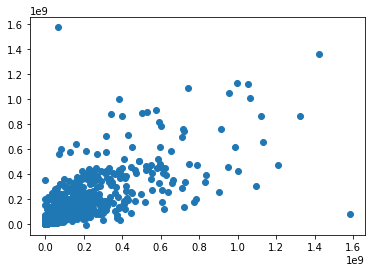

<matplotlib.collections.PathCollection at 0x7f56446f8590>

In [0]:
plt.scatter(test_panda['revenue_adj'],test_panda['prediction'])